# Вахитов Юрий БКЛ182 ДЗ 2 Часть 2

### Подготовка
### импоритруем все необходимые модули

In [101]:
from pprint import pprint
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()
import nltk
from nltk import draw
from nltk.tokenize import word_tokenize
import json
import collections
import pandas as pd
import seaborn as sns
import random
random.seed = 23
from nltk.probability import FreqDist
%matplotlib inline
import matplotlib.pyplot as plt



### Открываю книгу (Айзек Азимов "Основание Земли")

In [102]:
with open('book.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    tokens = word_tokenize(text)


### Токенизация  и парсинг текста

In [103]:
tokens = word_tokenize(text)
lemmas = []
for i in tokens:
    lemma = morph.parse(i)
    lemmas.append(lemma)

### Создаю список словарей 

In [104]:
lemmas_2 = []
for i in range(len(lemmas)):
    wordform = lemmas[i][0]
    lemmas_2.append({'Слово': wordform.word,
                      'Лемма': wordform.normal_form,
                      'Часть речи': wordform.tag.POS,
                      'Падеж': wordform.tag.case,
                      'Число': wordform.tag.number,
                      'Род': wordform.tag.gender,
                      'Одушевленность': wordform.tag.animacy,
                      'Вид': wordform.tag.aspect,
                      'Включенность': wordform.tag.involvement,
                      'Наклонение': wordform.tag.mood,
                      'Лицо': wordform.tag.person,
                      'Время': wordform.tag.tense,
                      'Переходность': wordform.tag.transitivity,
                      'Залог ': wordform.tag.voice
                     }
                    )

## Задание 1

### Преобразовываю данные в датафрейм
### Вывожу их

In [105]:
dataframe = pd.DataFrame(lemmas_pm).fillna('')
dataframe

,Слово,Лемма,Часть речи,Падеж,Число,Род,Одушевленность,Вид,Включенность,Наклонение,Лицо,Время,Переходность,Залог
0,айзек,айзек,NOUN,nomn,sing,masc,anim,,,,,,,
1,азимов,азим,NOUN,gent,plur,masc,anim,,,,,,,
2,.,.,,,,,,,,,,,,
3,основание,основание,NOUN,nomn,sing,neut,inan,,,,,,,
4,и,и,CONJ,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146435,",",",",,,,,,,,,,,,
146436,преобразователя,преобразователь,NOUN,gent,sing,masc,inan,,,,,,,
146437,",",",",,,,,,,,,,,,
146438,иного,иной,ADJF,gent,sing,neut,,,,,,,,


## Задание 2

### График 1
#### Разделяю падежи по частотности 

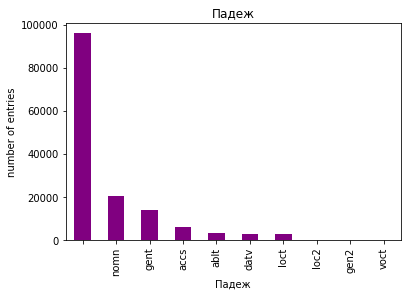

In [106]:
df['Падеж'].value_counts().plot.bar(color='purple'); 
plt.title('Падеж')
plt.xlabel('Падеж')
plt.ylabel('number of entries');



### График 2
Разделяю по частотности род при помощи другого графика

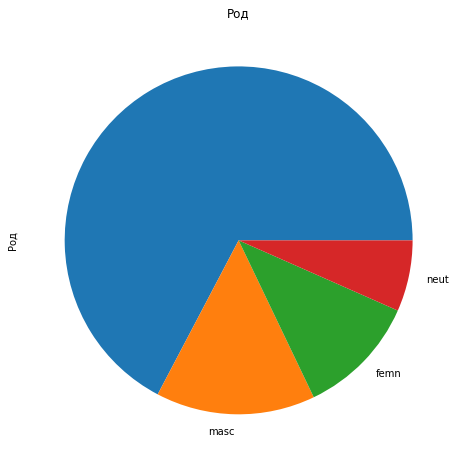

In [107]:
plt.figure(figsize=(8, 8))
dataframe['Род'].value_counts().plot(kind='pie');
plt.title('Род');


### График 3
Длина слов

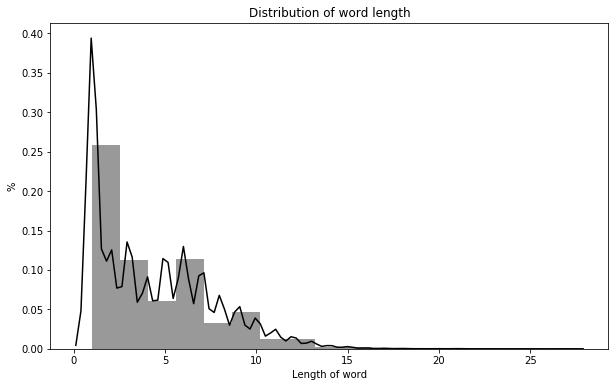

In [56]:
dataframe['length'] = df['Слово'].apply(len)
plt.figure(figsize=(10, 6))
sns.distplot(dataframe['length'], bins=17, color='Black')
plt.title('Distribution of word length')
plt.ylabel('%')
plt.xlabel('Length of word');

## Задание 3

### Свой график
Рассматриваю по частотности формы глагола "идти" 

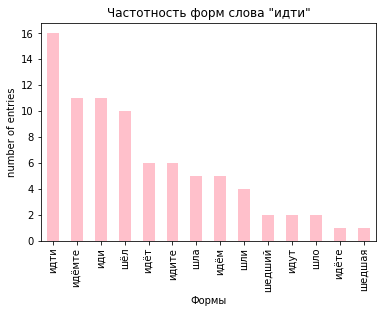

In [91]:
dataframe[df['Лемма'] == 'идти']['Слово'].value_counts().plot.bar(color='pink');
plt.title('Частотность форм слова "идти"')
plt.xlabel('Формы')
plt.ylabel('number of entries');

## Задание 4

In [100]:
words = ['Яков', 'Тревиз']
draw.dispersion.dispersion_plot(dataframe['Слово'], 
words, ignore_case=True, 
title="Lexical Dispersion Plot")

NameError: name 'dataframe' is not defined